# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.126745e+01     8.513894e+00
 * time: 0.005628108978271484
     1     3.041411e+01     6.419440e+00
 * time: 0.027076005935668945
     2     2.427983e+01     8.278970e+00
 * time: 0.05308413505554199
     3     2.298161e+01     9.595253e+00
 * time: 0.07804298400878906
     4     1.192047e+01     2.009296e+00
 * time: 0.10776114463806152
     5     9.999152e+00     1.187456e+00
 * time: 0.13630318641662598
     6     9.539207e+00     1.474358e+00
 * time: 0.1569380760192871
     7     9.074785e+00     1.069790e+00
 * time: 0.1776881217956543
     8     8.670273e+00     8.439323e-01
 * time: 0.19802498817443848
     9     8.414676e+00     9.627263e-01
 * time: 0.21768498420715332
    10     8.225730e+00     6.246965e-01
 * time: 0.23817801475524902
    11     8.101642e+00     6.768634e-01
 * time: 0.2585639953613281
    12     7.973377e+00     6.134073e-01
 * time: 0.27837204933166504
    13     7.887424e+00     3.299777e-01
 * time: 

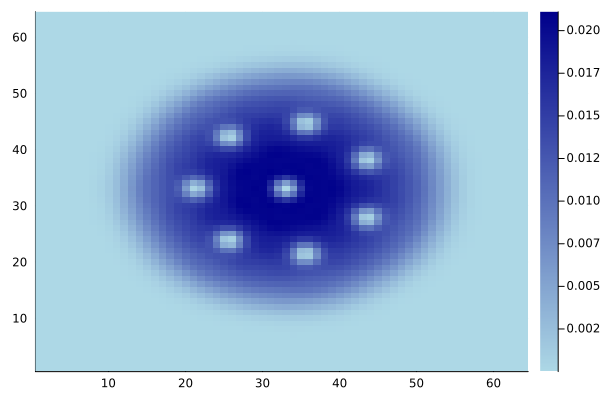

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)